In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option("display.max_columns", None)

## Import data

In [2]:
INPUT_FILE = '../data/histogram.csv'

In [3]:
def read_file(fpath):
    fobj = open(fpath, 'r')
    data = fobj.read()
    fobj.close()
    return [line.split(',') for line in data.split('\n')]

In [4]:
data = read_file(INPUT_FILE)[:-1]

In [5]:
columns = data[0]

In [6]:
columns

['Block#',
 'Gas used',
 'STOP',
 'ADD',
 'MUL',
 'SUB',
 'DIV',
 'SDIV',
 'MOD',
 'SMOD',
 'ADDMOD',
 'MULMOD',
 'EXP',
 'SIGNEXTEND',
 '-',
 '-',
 '-',
 '-',
 'LT',
 'GT',
 'SLT',
 'SGT',
 'EQ',
 'ISZERO',
 'AND',
 'OR',
 'XOR',
 'NOT',
 'BYTE',
 'SHL',
 'SHR',
 'SAR',
 '-',
 '-',
 'KECCAK256',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'ADDRESS',
 'BALANCE',
 'ORIGIN',
 'CALLER',
 'CALLVALUE',
 'CALLDATALOAD',
 'CALLDATASIZE',
 'CALLDATACOPY',
 'CODESIZE',
 'CODECOPY',
 'GASPRICE',
 'EXTCODESIZE',
 'EXTCODECOPY',
 'RETURNDATASIZE',
 'RETURNDATACOPY',
 'EXTCODEHASH',
 'BLOCKHASH',
 'COINBASE',
 'TIMESTAMP',
 'NUMBER',
 'DIFFICULTY',
 'GASLIMIT',
 'CHAINID',
 'SELFBALANCE',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'POP',
 'MLOAD',
 'MSTORE',
 'MSTORE8',
 'SLOAD',
 'SSTORE',
 'JUMP',
 'JUMPI',
 'PC',
 'MSIZE',
 'GAS',
 'JUMPDEST',
 '-',
 '-',
 '-',
 '-',
 'PUSH1',
 'PUSH2',
 'PUSH3',
 'PUSH4',
 'PUSH5',
 'PUSH6',
 'PUSH7',
 'PUSH8

In [7]:
df = pd.DataFrame(data[2:], columns=columns)

In [8]:
df

,Block#,Gas used,STOP,ADD,MUL,SUB,DIV,SDIV,MOD,SMOD,ADDMOD,MULMOD,EXP,SIGNEXTEND,-,-,-,-,LT,GT,SLT,SGT,EQ,ISZERO,AND,OR,XOR,NOT,BYTE,SHL,SHR,SAR,-,-,KECCAK256,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,ADDRESS,BALANCE,ORIGIN,CALLER,CALLVALUE,CALLDATALOAD,CALLDATASIZE,CALLDATACOPY,CODESIZE,CODECOPY,GASPRICE,EXTCODESIZE,EXTCODECOPY,RETURNDATASIZE,RETURNDATACOPY,EXTCODEHASH,BLOCKHASH,COINBASE,TIMESTAMP,NUMBER,DIFFICULTY,GASLIMIT,CHAINID,SELFBALANCE,-,-,-,-,-,-,-,-,POP,MLOAD,MSTORE,MSTORE8,SLOAD,SSTORE,JUMP,JUMPI,PC,MSIZE,GAS,JUMPDEST,-,-,-,-,PUSH1,PUSH2,PUSH3,PUSH4,PUSH5,PUSH6,PUSH7,PUSH8,PUSH9,PUSH10,PUSH11,PUSH12,PUSH13,PUSH14,PUSH15,PUSH16,PUSH17,PUSH18,PUSH19,PUSH20,PUSH21,PUSH22,PUSH23,PUSH24,PUSH25,PUSH26,PUSH27,PUSH28,PUSH29,PUSH30,PUSH31,PUSH32,DUP1,DUP2,DUP3,DUP4,DUP5,DUP6,DUP7,DUP8,DUP9,DUP10,DUP11,DUP12,DUP13,DUP14,DUP15,DUP16,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP6,SWAP7,SWAP8,SWAP9,SWAP10,SWAP11,SWAP12,SWAP13,SWAP14,SWAP15,SWAP16,LOG0,LOG1,LOG2,LOG3,LOG4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,CREATE,CALL,CALLCODE,RETURN,DELEGATECALL,CREATE2,-,-,-,-,STATICCALL,-,-,REVERT,INVALID,SELFDESTRUCT,PUSH0
0,8567261,8076091,101,6905,683,1707,940,0,16,0,0,1,1581,11,0,0,0,0,1919,695,13,20,3390,5767,4581,140,0,519,330,6,1,0,0,0,1157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,10,0,435,193,675,330,58,17,73,2,65,0,56,18,0,0,0,30,9,4,1,0,0,0,0,0,0,0,0,0,0,8766,2768,4333,154,1637,315,4173,7254,4,3,92,8261,0,0,0,0,19314,12438,8,3843,13,0,2,89,10,13,1,29,9,0,1,6,5,0,8,1683,7,0,2,0,5,0,0,1,172,0,0,271,6862,6780,3692,2635,1873,721,312,601,283,178,86,59,39,31,16,31,10011,4243,1932,735,245,95,57,35,27,26,8,2,4,0,0,0,0,12,6,110,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,0,101,20,0,0,0,0,0,7,0,0,2,0,0,5149
1,8567262,8082858,53,9571,1473,1466,1535,0,45,0,0,0,802,4,0,0,0,0,1547,822,0,2,2947,5471,5161,238,0,434,161,142,29,0,0,0,642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,2,0,216,154,398,308,23,9,10,0,92,0,148,25,0,0,0,87,1,2,0,0,0,0,0,0,0,0,0,0,0,9274,3559,4282,74,2361,969,3747,6915,0,0,113,8349,0,0,0,0,21983,12718,277,2285,6,0,1,50,0,0,0,0,5,0,0,0,0,0,0,1258,2,0,1,0,0,0,0,0,172,0,0,89,7637,7211,5698,2231,1305,685,444,302,215,24,14,23,7,6,7,0,9010,3578,1929,601,168,83,37,25,12,11,11,0,0,0,0,0,0,3,0,51,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,0,113,18,0,0,0,0,0,32,0,0,2,0,0,4253
2,8567263,8073204,49,9388,1111,1714,1495,0,5,0,0,0,1526,0,0,0,0,0,1541,641,0,0,3130,6079,4459,175,2,323,2,92,18,0,0,0,1385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,1,8,262,212,613,369,40,13,27,2,151,0,165,19,0,2,1,12,12,0,1,0,0,0,0,0,0,0,0,0,0,10426,3353,5338,15,2415,741,3981,6768,0,1,167,8171,0,0,0,0,22898,12153,25,3363,26,4,18,39,1,1,1,0,10,0,0,49,14,0,0,1955,0,0,0,0,0,3,0,5,240,0,0,215,7404,8223,4401,2626,1289,822,526,687,317,182,71,81,75,47,93,109,10218,3736,2189,471,293,133,77,34,22,117,12,8,4,0,1,0,0,15,6,66,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,0,185,18,1,0,0,0,0,16,0,0,0,0,0,6250
3,8567265,8051312,25,10195,1739,1210,1691,0,0,0,0,0,603,0,0,0,0,0,1206,392,20,0,871,4011,3170,318,0,308,1,2,2,0,0,0,583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2,0,97,120,285,196,9,1,1,0,66,0,67,3,0,0,0,125,0,0,0,0,0,0,0,0,0,0,0,0,0,6452,3431,4245,0,2897,1319,2146,3337,1,0,72,4519,0,0,0,0,17643,7744,121,857,2,0,0,29,0,0,0,0,1,0,0,7,1,0,0,1216,2,0,0,0,0,0,0,0,157,0,0,54,5466,7243,4850,1512,880,479,174,115,32,9,5,2,1,3,0,1,6956,2391,949,127,21,73,2,3,3,0,0,1,1,0,0,0,0,4,2,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,0,75,4,0,0,0,0,0,3,0,0,4,0,0,2872
4,8567266,8053007,54,101

## Convert relevant fields to int

In [9]:
df['PUSH0'] = df['PUSH0'].astype(int)
df['PUSH1'] = df['PUSH1'].astype(int)
df['PUSH2'] = df['PUSH2'].astype(int)
df['PUSH3'] = df['PUSH3'].astype(int)
df['PUSH4'] = df['PUSH4'].astype(int)
df['PUSH5'] = df['PUSH5'].astype(int)
df['PUSH6'] = df['PUSH6'].astype(int)
df['PUSH7'] = df['PUSH7'].astype(int)
df['PUSH8'] = df['PUSH8'].astype(int)
df['PUSH9'] = df['PUSH9'].astype(int)
df['PUSH10'] = df['PUSH10'].astype(int)
df['PUSH11'] = df['PUSH11'].astype(int)
df['PUSH12'] = df['PUSH12'].astype(int)
df['PUSH13'] = df['PUSH13'].astype(int)
df['PUSH14'] = df['PUSH14'].astype(int)
df['PUSH15'] = df['PUSH15'].astype(int)
df['PUSH16'] = df['PUSH16'].astype(int)
df['PUSH17'] = df['PUSH17'].astype(int)
df['PUSH18'] = df['PUSH18'].astype(int)
df['PUSH19'] = df['PUSH19'].astype(int)
df['PUSH20'] = df['PUSH20'].astype(int)
df['PUSH21'] = df['PUSH21'].astype(int)
df['PUSH22'] = df['PUSH22'].astype(int)
df['PUSH23'] = df['PUSH23'].astype(int)
df['PUSH24'] = df['PUSH24'].astype(int)
df['PUSH25'] = df['PUSH25'].astype(int)
df['PUSH26'] = df['PUSH26'].astype(int)
df['PUSH27'] = df['PUSH27'].astype(int)
df['PUSH28'] = df['PUSH28'].astype(int)
df['PUSH29'] = df['PUSH29'].astype(int)
df['PUSH30'] = df['PUSH30'].astype(int)
df['PUSH31'] = df['PUSH31'].astype(int)
df['PUSH32'] = df['PUSH32'].astype(int)

df['CALLDATASIZE'] = df['CALLDATASIZE'].astype(int)
df['RETURNDATASIZE'] = df['RETURNDATASIZE'].astype(int)
df['MSIZE'] = df['RETURNDATASIZE'].astype(int)

## Remove rows with incomplete information

(PUSH1 opcode count == 0)

In [10]:
df = df[df.PUSH1 != 0]

In [11]:
df

,Block#,Gas used,STOP,ADD,MUL,SUB,DIV,SDIV,MOD,SMOD,ADDMOD,MULMOD,EXP,SIGNEXTEND,-,-,-,-,LT,GT,SLT,SGT,EQ,ISZERO,AND,OR,XOR,NOT,BYTE,SHL,SHR,SAR,-,-,KECCAK256,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,ADDRESS,BALANCE,ORIGIN,CALLER,CALLVALUE,CALLDATALOAD,CALLDATASIZE,CALLDATACOPY,CODESIZE,CODECOPY,GASPRICE,EXTCODESIZE,EXTCODECOPY,RETURNDATASIZE,RETURNDATACOPY,EXTCODEHASH,BLOCKHASH,COINBASE,TIMESTAMP,NUMBER,DIFFICULTY,GASLIMIT,CHAINID,SELFBALANCE,-,-,-,-,-,-,-,-,POP,MLOAD,MSTORE,MSTORE8,SLOAD,SSTORE,JUMP,JUMPI,PC,MSIZE,GAS,JUMPDEST,-,-,-,-,PUSH1,PUSH2,PUSH3,PUSH4,PUSH5,PUSH6,PUSH7,PUSH8,PUSH9,PUSH10,PUSH11,PUSH12,PUSH13,PUSH14,PUSH15,PUSH16,PUSH17,PUSH18,PUSH19,PUSH20,PUSH21,PUSH22,PUSH23,PUSH24,PUSH25,PUSH26,PUSH27,PUSH28,PUSH29,PUSH30,PUSH31,PUSH32,DUP1,DUP2,DUP3,DUP4,DUP5,DUP6,DUP7,DUP8,DUP9,DUP10,DUP11,DUP12,DUP13,DUP14,DUP15,DUP16,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP6,SWAP7,SWAP8,SWAP9,SWAP10,SWAP11,SWAP12,SWAP13,SWAP14,SWAP15,SWAP16,LOG0,LOG1,LOG2,LOG3,LOG4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,CREATE,CALL,CALLCODE,RETURN,DELEGATECALL,CREATE2,-,-,-,-,STATICCALL,-,-,REVERT,INVALID,SELFDESTRUCT,PUSH0
0,8567261,8076091,101,6905,683,1707,940,0,16,0,0,1,1581,11,0,0,0,0,1919,695,13,20,3390,5767,4581,140,0,519,330,6,1,0,0,0,1157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,10,0,435,193,675,330,58,17,73,2,65,0,56,18,0,0,0,30,9,4,1,0,0,0,0,0,0,0,0,0,0,8766,2768,4333,154,1637,315,4173,7254,4,56,92,8261,0,0,0,0,19314,12438,8,3843,13,0,2,89,10,13,1,29,9,0,1,6,5,0,8,1683,7,0,2,0,5,0,0,1,172,0,0,271,6862,6780,3692,2635,1873,721,312,601,283,178,86,59,39,31,16,31,10011,4243,1932,735,245,95,57,35,27,26,8,2,4,0,0,0,0,12,6,110,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,0,101,20,0,0,0,0,0,7,0,0,2,0,0,5149
1,8567262,8082858,53,9571,1473,1466,1535,0,45,0,0,0,802,4,0,0,0,0,1547,822,0,2,2947,5471,5161,238,0,434,161,142,29,0,0,0,642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,2,0,216,154,398,308,23,9,10,0,92,0,148,25,0,0,0,87,1,2,0,0,0,0,0,0,0,0,0,0,0,9274,3559,4282,74,2361,969,3747,6915,0,148,113,8349,0,0,0,0,21983,12718,277,2285,6,0,1,50,0,0,0,0,5,0,0,0,0,0,0,1258,2,0,1,0,0,0,0,0,172,0,0,89,7637,7211,5698,2231,1305,685,444,302,215,24,14,23,7,6,7,0,9010,3578,1929,601,168,83,37,25,12,11,11,0,0,0,0,0,0,3,0,51,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,0,113,18,0,0,0,0,0,32,0,0,2,0,0,4253
2,8567263,8073204,49,9388,1111,1714,1495,0,5,0,0,0,1526,0,0,0,0,0,1541,641,0,0,3130,6079,4459,175,2,323,2,92,18,0,0,0,1385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,1,8,262,212,613,369,40,13,27,2,151,0,165,19,0,2,1,12,12,0,1,0,0,0,0,0,0,0,0,0,0,10426,3353,5338,15,2415,741,3981,6768,0,165,167,8171,0,0,0,0,22898,12153,25,3363,26,4,18,39,1,1,1,0,10,0,0,49,14,0,0,1955,0,0,0,0,0,3,0,5,240,0,0,215,7404,8223,4401,2626,1289,822,526,687,317,182,71,81,75,47,93,109,10218,3736,2189,471,293,133,77,34,22,117,12,8,4,0,1,0,0,15,6,66,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,0,185,18,1,0,0,0,0,16,0,0,0,0,0,6250
3,8567265,8051312,25,10195,1739,1210,1691,0,0,0,0,0,603,0,0,0,0,0,1206,392,20,0,871,4011,3170,318,0,308,1,2,2,0,0,0,583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2,0,97,120,285,196,9,1,1,0,66,0,67,3,0,0,0,125,0,0,0,0,0,0,0,0,0,0,0,0,0,6452,3431,4245,0,2897,1319,2146,3337,1,67,72,4519,0,0,0,0,17643,7744,121,857,2,0,0,29,0,0,0,0,1,0,0,7,1,0,0,1216,2,0,0,0,0,0,0,0,157,0,0,54,5466,7243,4850,1512,880,479,174,115,32,9,5,2,1,3,0,1,6956,2391,949,127,21,73,2,3,3,0,0,1,1,0,0,0,0,4,2,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,0,75,4,0,0,0,0,0,3,0,0,4,0,0,2872
4,8567266,8053007,

## Get the sum of all PUSH opcodes

In [12]:
df['ALLPUSH'] = df['PUSH1'] + df['PUSH2'] +  df['PUSH3'] + df['PUSH4']  \
    + df['PUSH5'] + df['PUSH6'] + df['PUSH7'] + df['PUSH8'] \
    + df['PUSH9'] + df['PUSH10'] + df['PUSH11'] + df['PUSH12'] \
    + df['PUSH13'] + df['PUSH14'] + df['PUSH15'] + df['PUSH16'] \
    + df['PUSH17'] + df['PUSH18'] + df['PUSH19'] + df['PUSH20'] \
    + df['PUSH21'] + df['PUSH22'] + df['PUSH23'] + df['PUSH24'] \
    + df['PUSH25'] + df['PUSH26'] + df['PUSH27'] + df['PUSH28'] \
    + df['PUSH29'] + df['PUSH30'] + df['PUSH31'] + df['PUSH32']

/tmp/ipykernel_164081/1619238750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ALLPUSH'] = df['PUSH1'] + df['PUSH2'] +  df['PUSH3'] + df['PUSH4']  \


## Calculate PUSH 00 percentage vs all PUSH opcodes sum

In [13]:
df['PUSH0_perc'] = (df['PUSH0'] / df['ALLPUSH'] ) * 100

/tmp/ipykernel_164081/1578794131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PUSH0_perc'] = (df['PUSH0'] / df['ALLPUSH'] ) * 100


In [14]:
df = df.sort_values(by=['PUSH0_perc'])

df[
    ['Block#', 
     'PUSH1', 'PUSH2', 'PUSH3', 'PUSH4', 'PUSH5', 'PUSH6', 'PUSH7', 'PUSH8', 
     'PUSH9', 'PUSH10', 'PUSH11', 'PUSH12', 'PUSH13', 'PUSH14', 'PUSH15', 'PUSH16', 
     'PUSH17', 'PUSH18', 'PUSH19', 'PUSH20', 'PUSH21', 'PUSH22', 'PUSH23', 'PUSH24', 
     'PUSH25', 'PUSH26', 'PUSH27', 'PUSH28', 'PUSH29', 'PUSH30', 'PUSH31', 'PUSH32',
     'ALLPUSH', 'PUSH0', 'PUSH0_perc']]

,Block#,PUSH1,PUSH2,PUSH3,PUSH4,PUSH5,PUSH6,PUSH7,PUSH8,PUSH9,PUSH10,PUSH11,PUSH12,PUSH13,PUSH14,PUSH15,PUSH16,PUSH17,PUSH18,PUSH19,PUSH20,PUSH21,PUSH22,PUSH23,PUSH24,PUSH25,PUSH26,PUSH27,PUSH28,PUSH29,PUSH30,PUSH31,PUSH32,ALLPUSH,PUSH0,PUSH0_perc
7708,8575336,36646,38480,45,1218,6,0,2,5,0,0,0,0,1,0,0,3,0,0,0,907,0,0,0,0,0,0,0,0,124,0,1,628,78066,1995,2.555530
12318,8580140,3503,6636,45,477,3,1,4,12,0,5,6,8,2,6,0,1,0,0,0,169,0,0,0,0,0,1,6,1,23,0,1,36,10946,502,4.586150
7710,8575338,30103,27476,12,2064,7,2,6,86,3,13,0,6,55,0,1,5,3,0,8,855,7,0,0,0,0,1,0,62,196,0,5,718,61694,2836,4.596881
1818,8569161,2853,4781,326,707,5,0,0,6,0,2,4,4,0,4,0,0,0,0,0,6,0,0,0,0,0,0,4,0,33,0,0,42,8777,406,4.625726
7706,8575333,25552,25068,30,1383,0,0,0,80,0,0,0,51,12,0,1,83,9,0,8,880,0,0,0,0,10,0,0,0,117,0,0,460,53744,2582,4.804257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,12208703,1979,97,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,319,0,0,0,0,0,0,0,0,0,0,2,2403,683,28.422805
17202,12208994,1979,97,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,319,0,0,0,0,0,0,0,0,0,0,2,2403,683,28.422805
15521,12207325,1979,97,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,319,0,0,0,0,0,0,0,0,0,0,2,2403,683,28.422805
2040,8569392,52672,32312,13,4546,10,4,11,14,0,1,1,42,4,0,0,46,14,0,0,460,0,0,0,0,0,0,0,0,165,0,0,173,90488,25867,28.586111


In [15]:
df['PUSH0_perc'].mean()

11.607030805208305

In [16]:
df['PUSH0_perc'].min()

2.555529936207824

In [17]:
df['PUSH0_perc'].max()

33.618598382749326

In [18]:
df['PUSH0'].mean()

5665.414984898407

In [19]:
df['PUSH0_perc_vs_PUSH1'] = (df['PUSH0'] / df['PUSH1'] ) * 100

In [20]:
df['PUSH0_perc_vs_PUSH1'].mean()

22.387591178321042

In [21]:
df['PUSH0_perc_vs_PUSH1'].min()

5.443977514599138

In [22]:
df['PUSH0_perc_vs_PUSH1'].max()

50.3618804082285

## Show histogram of all PUSH opcodes count

<AxesSubplot:>

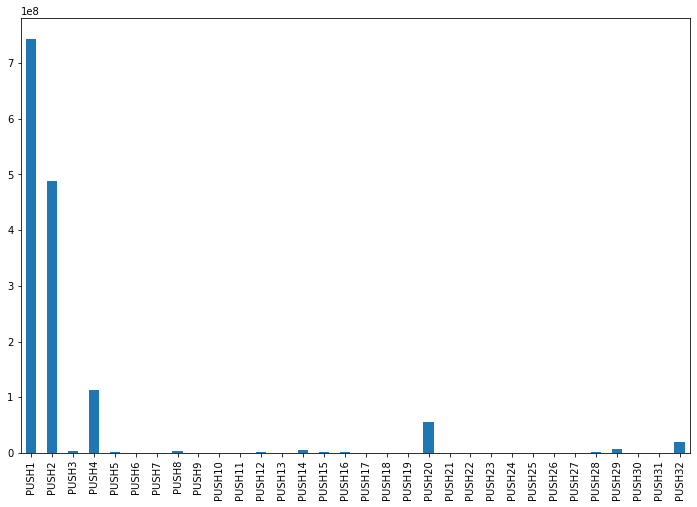

In [23]:
df[['PUSH1', 'PUSH2', 'PUSH3', 'PUSH4', 'PUSH5', 'PUSH6', 'PUSH7', 'PUSH8', 'PUSH9', 
    'PUSH10', 'PUSH11', 'PUSH12', 'PUSH13', 'PUSH14', 'PUSH15', 'PUSH16', 'PUSH17', 'PUSH18', 'PUSH19',
    'PUSH20', 'PUSH21', 'PUSH22', 'PUSH23', 'PUSH24', 'PUSH25', 'PUSH26', 'PUSH27', 'PUSH28', 'PUSH29',
    'PUSH30', 'PUSH31', 'PUSH32']].sum().plot(kind='bar')


## Show histogram of all PUSH opcodes and others used to push 00 on the stack (MSIZE, CALLDATASIZE, RETURNDATASIZE)

<AxesSubplot:>

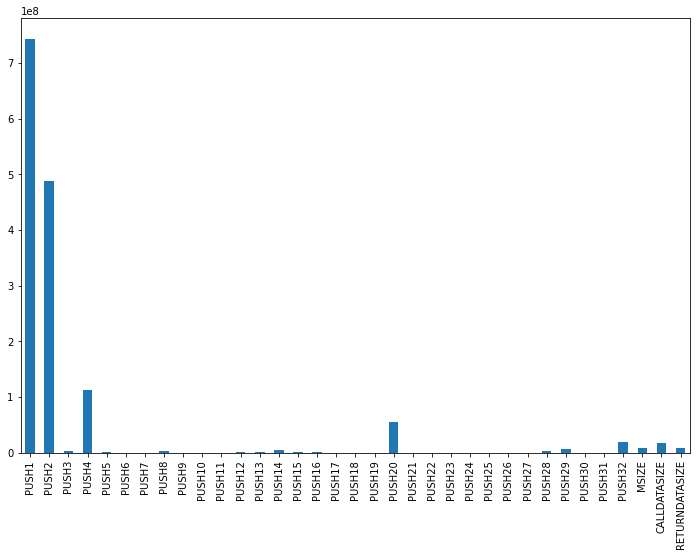

In [24]:
df[['PUSH1', 'PUSH2', 'PUSH3', 'PUSH4', 'PUSH5', 'PUSH6', 'PUSH7', 'PUSH8', 'PUSH9', 
    'PUSH10', 'PUSH11', 'PUSH12', 'PUSH13', 'PUSH14', 'PUSH15', 'PUSH16', 'PUSH17', 'PUSH18', 'PUSH19',
    'PUSH20', 'PUSH21', 'PUSH22', 'PUSH23', 'PUSH24', 'PUSH25', 'PUSH26', 'PUSH27', 'PUSH28', 'PUSH29',
    'PUSH30', 'PUSH31', 'PUSH32', 'MSIZE', 'CALLDATASIZE', 'RETURNDATASIZE']].sum().plot(kind='bar')

## Show histogram of all PUSH opcodes, separate PUSH pushing 00 on the stack, and others used to push 00 on the stack (MSIZE, CALLDATASIZE, RETURNDATASIZE)

<AxesSubplot:>

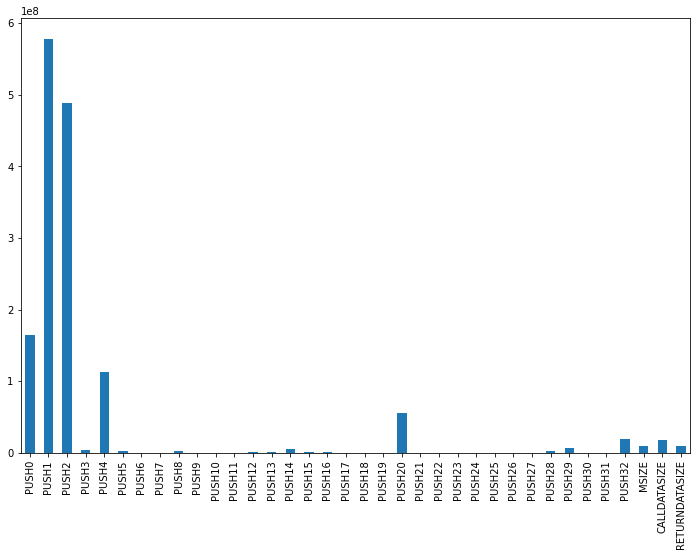

In [25]:
df2 = df.copy()
df2['PUSH1'] = df2['PUSH1'] - df2['PUSH0']
df2[['PUSH0', 'PUSH1', 'PUSH2', 'PUSH3', 'PUSH4', 'PUSH5', 'PUSH6', 'PUSH7', 'PUSH8', 'PUSH9', 
    'PUSH10', 'PUSH11', 'PUSH12', 'PUSH13', 'PUSH14', 'PUSH15', 'PUSH16', 'PUSH17', 'PUSH18', 'PUSH19',
    'PUSH20', 'PUSH21', 'PUSH22', 'PUSH23', 'PUSH24', 'PUSH25', 'PUSH26', 'PUSH27', 'PUSH28', 'PUSH29',
    'PUSH30', 'PUSH31', 'PUSH32', 'MSIZE', 'CALLDATASIZE', 'RETURNDATASIZE']].sum().plot(kind='bar')